In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
res = requests.get("https://finance.yahoo.com/quote/%5EIBEX/components")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
df[0].to_json(orient='records')

'[{"Symbol":"ACX.MC","Company Name":"Acerinox, S.A.","Last Price":11.58,"Change":0.0,"% Change":"0.00%","Volume":457213},{"Symbol":"COL.MC","Company Name":"Inmobiliaria Colonial, SOCIMI, S.A.","Last Price":9.33,"Change":0.01,"% Change":"+0.05%","Volume":838821},{"Symbol":"MAP.MC","Company Name":"Mapfre, S.A.","Last Price":2.536,"Change":-0.003,"% Change":"-0.12%","Volume":2775669},{"Symbol":"CLNX.MC","Company Name":"Cellnex Telecom, S.A.","Last Price":22.09,"Change":-0.03,"% Change":"-0.14%","Volume":320374},{"Symbol":"SAB.MC","Company Name":"Banco de Sabadell, S.A.","Last Price":1.32,"Change":0.0,"% Change":"-0.15%","Volume":10602587},{"Symbol":"MTS.MC","Company Name":"ArcelorMittal","Last Price":25.95,"Change":0.04,"% Change":"+0.15%","Volume":84779},{"Symbol":"GRF.MC","Company Name":"Grifols, S.A.","Last Price":25.38,"Change":0.05,"% Change":"+0.20%","Volume":255673},{"Symbol":"TEF.MC","Company Name":"Telef\\u00f3nica, S.A.","Last Price":7.005,"Change":0.018,"% Change":"+0.26%","Vol

In [10]:
ibex_components = list(df[0]['Symbol'])
ibex = pdr.get_data_yahoo(ibex_components, 
                           '2008-01-01',
                            '2018-8-24')['Adj Close']


[*********************100%***********************]  30 of 30 downloaded


In [13]:
selection = ibex[['SAN.MC','TEF.MC','SGRE.MC','ENG.MC','ITX.MC']]
selection.columns = ['SANTANDER', 'TELEFONICA', 'GAMESA', 'ENAGAS', 'INDITEX']
selection.head()

,SANTANDER,TELEFONICA,GAMESA,ENAGAS,INDITEX
Date,,,,,
2008-01-02,5.595079,10.720781,30.969999,10.520387,3.379318
2008-01-03,5.541409,10.506130,30.540001,10.411179,3.300785
2008-01-04,5.460856,10.442735,29.469999,10.114758,3.077207
2008-01-07,5.426378,10.828082,28.230000,10.130360,2.975435
2008-01-08,5.342005,11.008546,28.750000,10.473583,2.938572


In [16]:
selection['SANTANDER_evo']= selection['SANTANDER'] / selection['SANTANDER'].iloc[0]
selection['TELEFONICA_evo']= selection['TELEFONICA'] / selection['TELEFONICA'].iloc[0]
selection['GAMESA_evo']= selection['GAMESA'] / selection['GAMESA'].iloc[0]
selection['ENAGAS_evo']= selection['ENAGAS'] / selection['ENAGAS'].iloc[0]
selection['INDITEX_evo']= selection['INDITEX'] / selection['INDITEX'].iloc[0]

C:\Users\abelb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\abelb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abelb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [16]:
# INVERTIMOS 20 POR CIENTO EN CADA UNA

In [17]:
selection['alocacion_santander'] = 0.2
selection['alocacion_telefonica'] = 0.2
selection['alocacion_gamesa'] = 0.2
selection['alocacion_enagas'] = 0.2
selection['alocacion_inditex'] = 0.2
    

C:\Users\abelb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\abelb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abelb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [19]:
portfolio = 40000 #40.000 euros 

In [21]:
investment = pd.DataFrame({'capital_san': selection['alocacion_santander'] * selection['SANTANDER_evo']* portfolio,
                                    'capital_tel' :selection['alocacion_telefonica'] *selection['TELEFONICA_evo']* portfolio,
                                    'capital_gam':selection['alocacion_gamesa']*selection['GAMESA_evo']* portfolio,
                                    'capital_enagas':selection['alocacion_enagas']*selection['ENAGAS_evo']* portfolio,
                                    'capital_inditex':selection['alocacion_inditex']*selection['INDITEX_evo']* portfolio},
                                     index = selection.index)

In [26]:
today_investment = investment.iloc[-1].sum()
print('YOUR CAPITAL TODAY : '+ str(np.round((today_investment), 2)))

YOUR CAPITAL TODAY : 100744.48


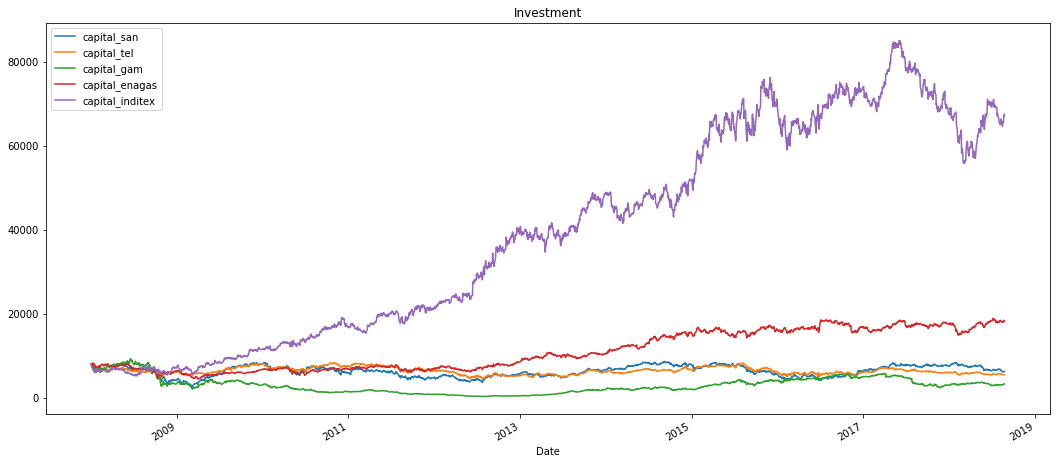

In [28]:
investment.plot(figsize = (18,8))
plt.legend()
plt.title('Investment'); # they started by 8000 euros

In [30]:
investment.iloc[-1] # per asset today

capital_san         6219.751321
capital_tel         5467.512115
capital_gam         3303.842535
capital_enagas     18189.444932
capital_inditex    67563.930947
Name: 2018-08-24 00:00:00, dtype: float64

# Returns

In [32]:
a =selection[['SANTANDER', 'TELEFONICA', 'GAMESA', 'ENAGAS', 'INDITEX']]

In [39]:
d = a.pct_change()


In [37]:
d.columns = d.columns + str('_returns')

In [40]:
d.tail()

,SANTANDER,TELEFONICA,GAMESA,ENAGAS,INDITEX
Date,,,,,
2018-08-20,0.002304,0.001641,0.025952,0.005038,0.006534
2018-08-21,0.011611,0.002184,0.038352,0.012114,0.008655
2018-08-22,-0.010795,-0.000136,0.004322,-0.001651,0.015731
2018-08-23,0.001034,-0.000954,0.002347,-0.007441,-0.002816
2018-08-24,-0.001607,-0.000818,-0.001561,-0.003748,0.007413


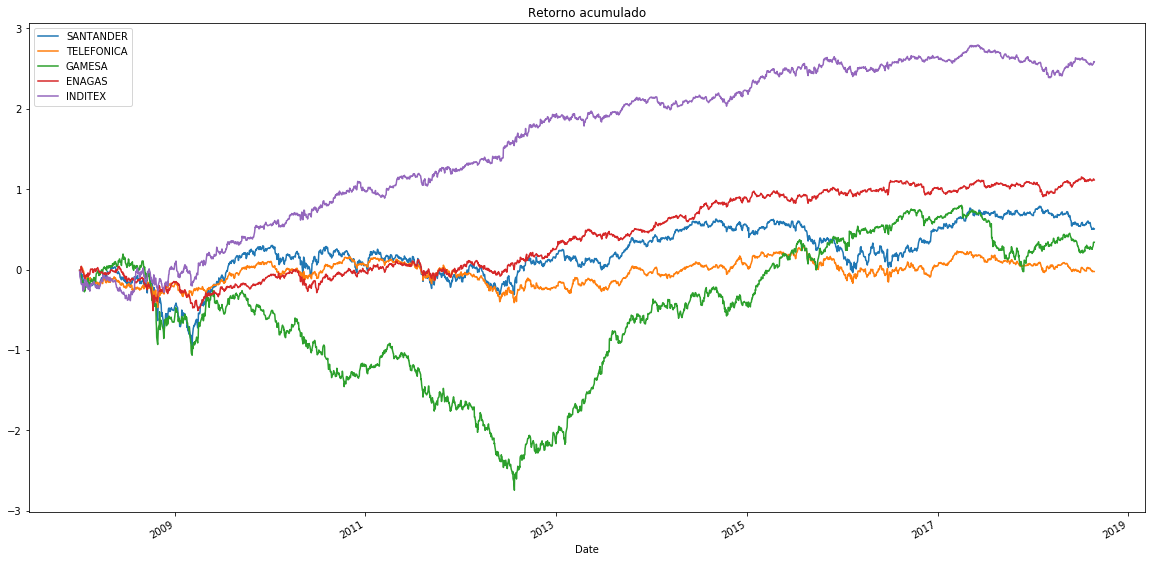

In [41]:
d.cumsum().plot(figsize = (20,10));
plt.title('Retorno acumulado');

In [42]:
investment['total_value']= investment.sum(axis=1)

In [43]:
portfolio_val =investment

In [45]:
portfolio_val['daily_return']=portfolio_val['total_value'].pct_change()

In [46]:
portfolio_val.head()

,capital_san,capital_tel,capital_gam,capital_enagas,capital_inditex,total_value,daily_return
Date,,,,,,,
2008-01-02,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,40000.000000,NaN
2008-01-03,7923.261137,7839.824356,7888.925279,7916.955146,7814.085564,39383.051482,-0.015424
2008-01-04,7808.084211,7792.518101,7612.528241,7691.548229,7284.800069,38189.478851,-0.030307
2008-01-07,7758.786605,8080.069540,7292.218511,7703.412432,7043.870982,37878.358070,-0.008147
2008-01-08,7638.147737,8214.734356,7426.542054,7964.408914,6956.603670,38200.436730,0.008503


In [42]:
#RETORNO DE LA CARTERA ANUAL

In [48]:
a = portfolio_val['daily_return'].mean()*256 *100
b =portfolio_val['daily_return'].std()*np.sqrt(252)*100
print('annual return ' + "%.2f" % a+' %' + ' annual vol ' + "%.2f" % b+' %')

annual return 11.62 % annual vol 24.02 %


In [44]:
#RETORNO DE LA CARTERA DIARIA

In [50]:
aa = portfolio_val['daily_return'].mean()
bb =portfolio_val['daily_return'].std()
print('daily return ' + "%.2f" % aa+' %' + ' daily vol ' + "%.2f" % bb+' %')

daily return 0.00 % daily vol 0.02 %


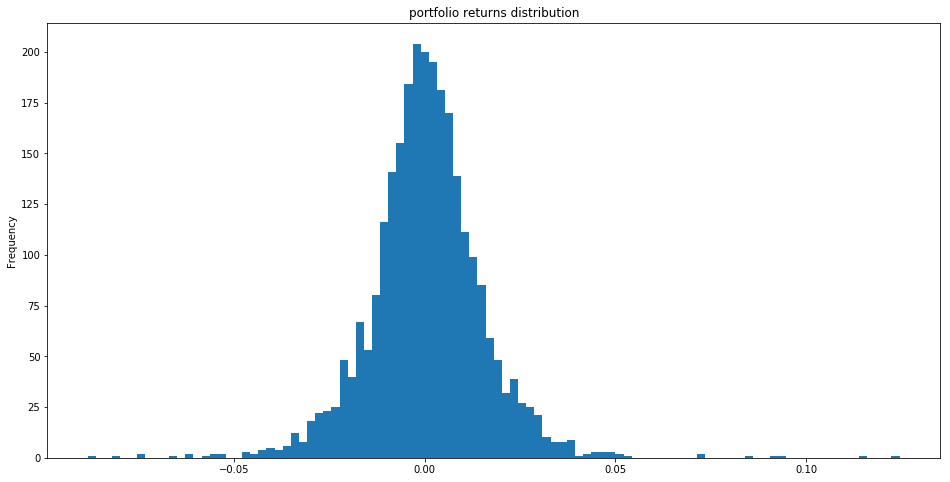

In [52]:
plt.title('portfolio returns distribution')
portfolio_val['daily_return'].plot(kind = 'hist', bins = 100, figsize = (16,8));

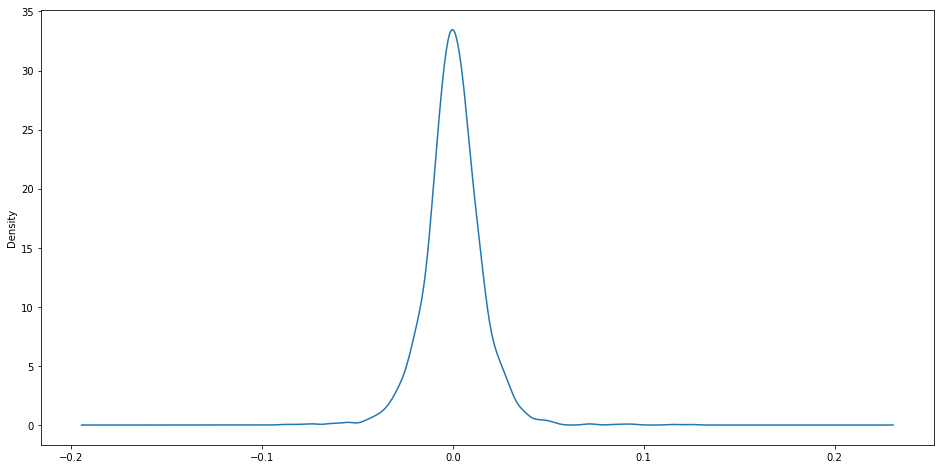

In [53]:
portfolio_val['daily_return'].plot(kind = 'KDE', figsize = (16,8));

In [56]:
cum_return = 100* (portfolio_val['total_value'][-1]/portfolio_val['total_value'][0] - 1)
print('portfolio return is %.2f' % cum_return + ' %')

portfolio return is 151.86 %


# SHARPE 

In [50]:
#VAMOS A SUPONER QUE EL RISK FREE = 0

In [57]:
SR = portfolio_val['daily_return'].mean() / portfolio_val['daily_return'].std()

In [58]:
SR

0.029987792661720393

In [59]:
Ratio_sharpe_annual = (252 **0.5)* SR
Ratio_sharpe_annual

0.47604145050407903

In [61]:
#different way to calculate sharpe ratio
Ratio_sharpe_annual = (portfolio_val['daily_return'].mean()*252 *100) / (portfolio_val['daily_return'].std()*np.sqrt(252)*100)
Ratio_sharpe_annual

0.4760414505040791

# some statistics

In [63]:
shares = selection.loc[:,['SANTANDER', 'TELEFONICA', 'GAMESA', 'ENAGAS', 'INDITEX']]

In [64]:
# % annual returns (percentaje of change)
shares.pct_change(1).mean()*252*100

SANTANDER      4.668939
TELEFONICA    -0.228146
GAMESA         3.149696
ENAGAS        10.325400
INDITEX       23.963087
dtype: float64

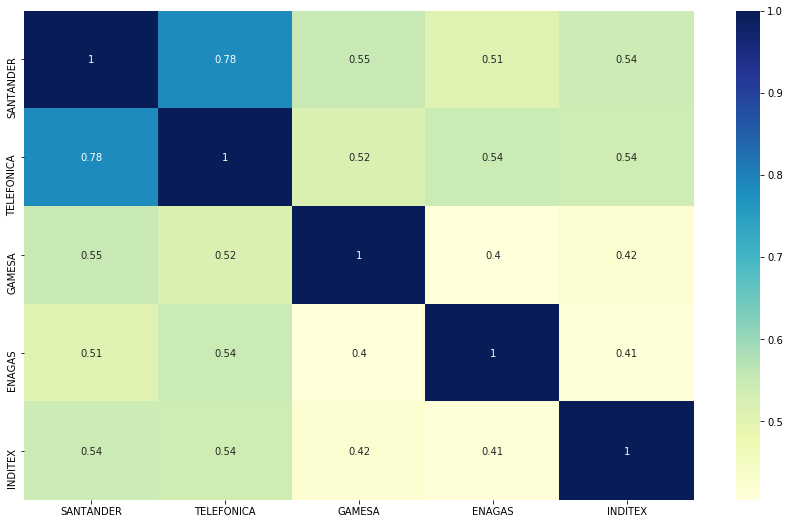

In [75]:
# correlation matrix
corr = shares.pct_change(1).corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, cmap="YlGnBu", annot=True);

# From now on, we will use logaritmic returns

In [82]:
# WHEN WE HAVE TO NORMALIZE IT IS BETTER TO WORK WITH LOGARITMIC RETURNS
log_ret = np.log(shares/shares.shift(1))


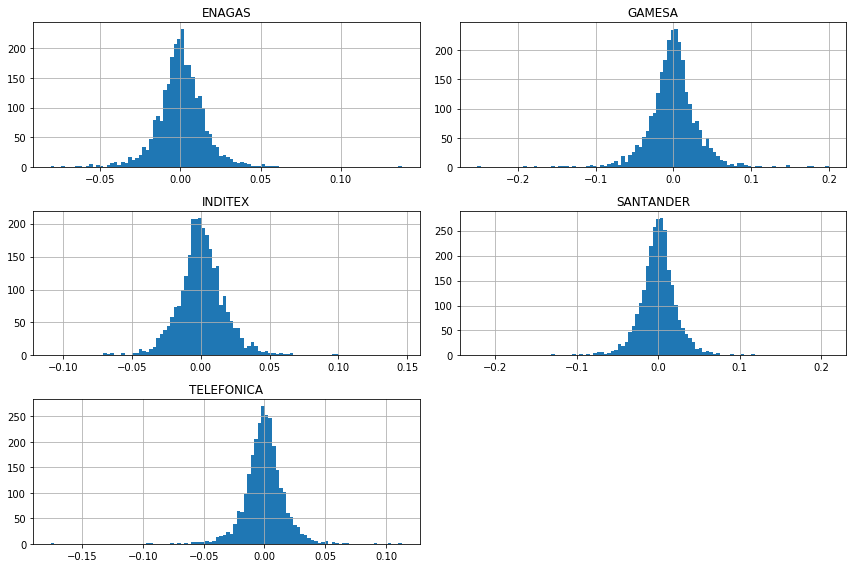

In [78]:
log_ret.hist(bins = 100, figsize = (12,8))
plt.tight_layout();

In [80]:
#COVARIANCE
log_ret.cov() * 252

,SANTANDER,TELEFONICA,GAMESA,ENAGAS,INDITEX
SANTANDER,0.140060,0.075642,0.098820,0.044286,0.058782
TELEFONICA,0.075642,0.066122,0.063397,0.032543,0.040027
GAMESA,0.098820,0.063397,0.227128,0.044923,0.057852
ENAGAS,0.044286,0.032543,0.044923,0.054267,0.027356
INDITEX,0.058782,0.040027,0.057852,0.027356,0.083459


In [81]:
# WE ARE GOING TO GENERATE SOME RANDOM WEIGHTS FOR OUR SHARES

In [84]:
np.random.seed(101) 

weights = np.array(np.random.random(5))

#sum of weights max 1 iqual to 100%
weights = weights / np.sum (weights)
weights

array([0.26182041, 0.28933544, 0.01443678, 0.08696357, 0.3474438 ])

In [86]:
expected_returns = np.sum(log_ret.mean()*weights*252) 
y = expected_returns *100
print('expected_returns: ' +str(np.round(y,2)) +' %')

expected_returns: 5.78 %


In [88]:
# porfolio variance = (transpose weights)* [(covariance * 252) * (weights)]
# multiply by 252 in order to annalize it

expected_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
print('expected_vol: ' +str(np.round(expected_vol * 100,2)) +' %')

expected_vol: 25.13 %


In [89]:
#SHARPE RATIO
SR = expected_returns / expected_vol
SR

0.23003832409329025

# simulation of our portfolio (Marcowitz modern portfolio theory)

In [93]:

np.random.seed(101) #si mantengo eso tengo la misma combinacion de numeros aleatorios

num_portfolios = 50000
all_weights = np.zeros((num_portfolios, len(shares.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    #PESOS
    weights = np.array(np.random.random(5))
    weights = weights / np.sum (weights)
    
    #guardamos los pesos
    all_weights[ind,:] = weights

    #RETORNO ESPERADO DE CARTERA
    ret_arr[ind] = np.sum(log_ret.mean()*weights*252)

    #VOLATILIDAD ESPERADA DE CARTERA                           
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

    #RATIO DE SHARPE
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

In [95]:
#MAXIMO SHARPE OBTENIDO 
sharpe_arr.max()

0.6478031723443272

In [96]:
Localization = sharpe_arr.argmax()
Localization

15534

In [97]:
optimum_weights = all_weights[Localization,:]
optimum_weights

array([0.02742667, 0.02337764, 0.01103339, 0.04825155, 0.88991075])

In [99]:
pd.DataFrame({'Opt weights %' :np.round(optimum_weights* 100, 2)}, index = shares.columns)

,Opt weights %
SANTANDER,2.74
TELEFONICA,2.34
GAMESA,1.10
ENAGAS,4.83
INDITEX,88.99


In [102]:
max_RatioSharpe_ret = ret_arr[Localization]
max_RatioSharpe_vol = vol_arr[Localization]

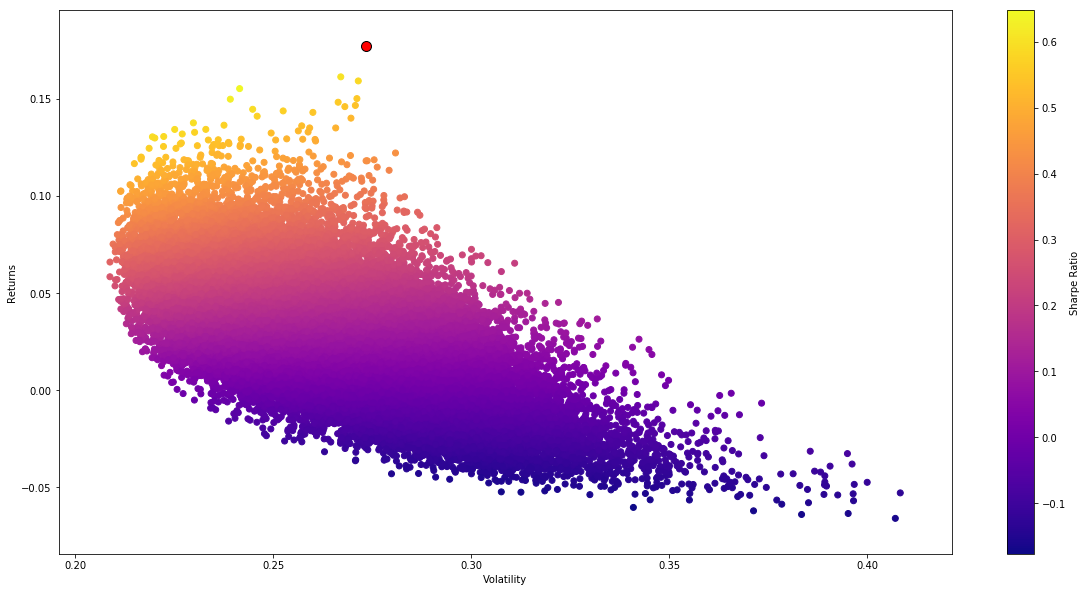

In [104]:
plt.figure (figsize = (20,10))
plt.scatter(vol_arr,ret_arr, c = sharpe_arr, cmap='plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel ('Volatility')
plt.ylabel ('Returns')
plt.scatter(max_RatioSharpe_vol,max_RatioSharpe_ret, c = 'r', s = 100, edgecolors='black');

# Another way for PORTFOLIO OPTIMIZATION 

In [166]:
# THIS MAKES MORE SENSE WHEN WE HAVE HUGE NUMBER OF ASSETS IN OUR PORTFOLIO

# IT IS LIKE A SOLVER 

def get_ret_vol_sr (weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean()*weights*252)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

In [167]:
from scipy.optimize import minimize

In [168]:
def neg_sharpe (weights):
    return get_ret_vol_sr(weights)[2] * - 1

In [169]:
def check_sum(weights):
    #retun 0 IF WEIGHTS SUM 1
    return np.sum(weights) - 1

In [170]:
cons = ({'type':'eq', 'fun': check_sum})

In [171]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

In [172]:
init_guess = [0.20,0.20,0.20,0.20,0.20]

In [173]:
opt_results = minimize(neg_sharpe, init_guess, method= 'SLSQP', bounds= bounds, constraints= cons)

In [174]:
opt_results

     fun: -0.6863085930322468
     jac: array([ 6.24028780e-01,  4.98788059e-01,  8.33423227e-01,  1.75058842e-04,
       -1.92075968e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([7.27692834e-16, 1.74755419e-16, 3.95339951e-16, 9.88068251e-02,
       9.01193175e-01])

In [175]:
opt_results.x 

array([7.27692834e-16, 1.74755419e-16, 3.95339951e-16, 9.88068251e-02,
       9.01193175e-01])

In [177]:
get_ret_vol_sr(opt_results.x)
#returns 18%, vol 27%, sharpe 0.68

array([0.18566241, 0.27052321, 0.68630859])

# EFFICIENT FRONTIER

In [190]:
y_frontier = np.linspace(-0.08,0.2,100)

In [191]:
def minimize_vol (weights):
    return get_ret_vol_sr(weights)[1]

In [192]:
frontier_vol =[]
for possible_returns in y_frontier:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq', 'fun': lambda w : get_ret_vol_sr(w)[0] - possible_returns})
    result = minimize(minimize_vol, init_guess, method = 'SLSQP', bounds = bounds, constraints= cons)
    frontier_vol.append(result['fun'])

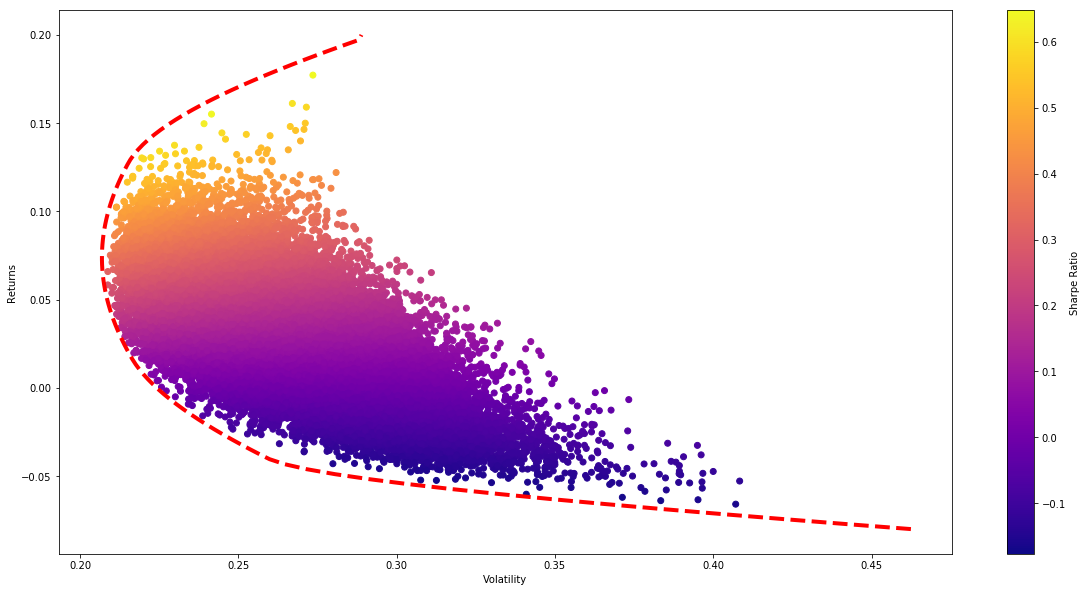

In [197]:
plt.figure (figsize = (20,10))
plt.scatter(vol_arr,ret_arr, c = sharpe_arr, cmap='plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel ('Volatility')
plt.ylabel ('Returns')

plt.plot(frontier_vol, y_frontier, 'r--', linewidth=4);